In [1]:
# import libaraies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
# load data
df = pd.read_csv('All the intermediate Colleges in Pakistan.csv')

In [5]:
df.head()

,Name,Location,Study Program,Sector,Affiliation,Rating
0,Campus.pk Lahore,"Office 206, 2nd Floor Siddique Trade Center Ma...",FSc Pre Engineering Fsc Pre Medical,Private,ads,0*
1,Allama Iqbal Open University Aiou Islamabad,"Sector H-8, Islamabad-44000",FSc Pre Engineering ICs Computer Science FSc P...,Public,NaN,5*
2,Government College University Gcu Lahore,"GC University, Katchery Road Lahore 54000",FSc Pre Engineering ICS Computer Science FSc P...,Public,HEC,4*
3,Govt College University GCU Faisalabad,"Kotwali Rd, Faisalabad 38000",FSc Pre-Engineering ICS FSc Pre-Medical Icom F...,Public,HEC,3*
4,Lahore College For Women University (Lcwu) Lahore,"Near Wapda Flats, Jail Road, Lahore",FA Arts FSc Pre Engineering ICS Physics ICS St...,Public,NaN,5*


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1630 entries, 0 to 1629
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Name           1630 non-null   object
 1   Location       1626 non-null   object
 2   Study Program  1630 non-null   object
 3   Sector         1101 non-null   object
 4   Affiliation    155 non-null    object
 5   Rating         1630 non-null   object
dtypes: object(6)
memory usage: 76.5+ KB


In [7]:
# find missing values
df.isnull().sum()

Name                0
Location            4
Study Program       0
Sector            529
Affiliation      1475
Rating              0
dtype: int64

In [15]:
# handle missing values
# imputation method for categoricl feature is mode
df['Sector'].fillna(df['Sector'].mode()[0], inplace=True)
 # drop the missing rows in Location column
df.dropna(subset=['Location'], inplace=True)


In [11]:
# Drop the columns which have more than 50% missing values
df.drop('Affiliation', axis=1, inplace=True) # drop the column

In [16]:
df.isnull().sum()

Name             0
Location         0
Study Program    0
Sector           0
Rating           0
dtype: int64

In [17]:
#  find incorrect values in the columns
df['Sector'].unique()


array(['Private', 'Public'], dtype=object)

In [18]:
#  find incorrect values in the columns
df['Rating'].unique()

array(['0*', '5*', '4*', '3*', '2*', '1*', '3.5*', '4.25*', '3.25*',
       '4.5*', '3.75*', '1.25*', '0.5*', '2.25*', '4.75*', '1.75*',
       '0.25*', '2.5*', '0.75*', '2.75*', '1.5*'], dtype=object)

In [19]:
# Remove * symbol from Rating column
df['Rating'] = df['Rating'].str.replace('*', '')


In [22]:
df.head()

,Name,Location,Study Program,Sector,Rating
0,Campus.pk Lahore,"Office 206, 2nd Floor Siddique Trade Center Ma...",FSc Pre Engineering Fsc Pre Medical,Private,0
1,Allama Iqbal Open University Aiou Islamabad,"Sector H-8, Islamabad-44000",FSc Pre Engineering ICs Computer Science FSc P...,Public,5
2,Government College University Gcu Lahore,"GC University, Katchery Road Lahore 54000",FSc Pre Engineering ICS Computer Science FSc P...,Public,4
3,Govt College University GCU Faisalabad,"Kotwali Rd, Faisalabad 38000",FSc Pre-Engineering ICS FSc Pre-Medical Icom F...,Public,3
4,Lahore College For Women University (Lcwu) Lahore,"Near Wapda Flats, Jail Road, Lahore",FA Arts FSc Pre Engineering ICS Physics ICS St...,Public,5


In [21]:
df.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1630 entries, 0 to 1629
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Name           1630 non-null   object
 1   Location       1630 non-null   object
 2   Study Program  1630 non-null   object
 3   Sector         1630 non-null   object
 4   Rating         1630 non-null   object
dtypes: object(5)
memory usage: 63.8+ KB


In [23]:
# convert datatype of rating column
df['Rating'] = df['Rating'].astype(float)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1630 entries, 0 to 1629
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           1630 non-null   object 
 1   Location       1630 non-null   object 
 2   Study Program  1630 non-null   object 
 3   Sector         1630 non-null   object 
 4   Rating         1630 non-null   float64
dtypes: float64(1), object(4)
memory usage: 63.8+ KB


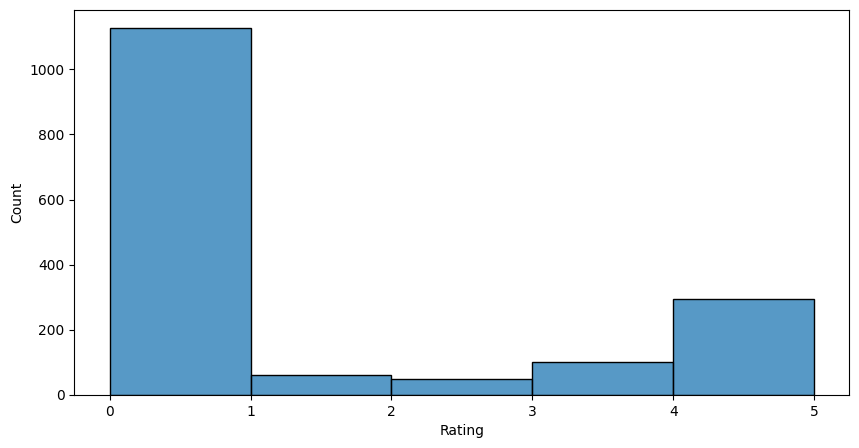

In [32]:
# draw bar graph for rating column to see the distribution of rating
plt.figure(figsize=(10, 5))
sns.histplot(df['Rating'], bins=5)
plt.show()


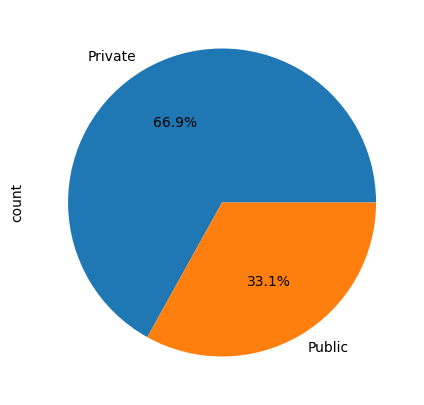

In [33]:
# draw pie charts for sector column
plt.figure(figsize=(10, 5))
df['Sector'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()


In [40]:
df['Study Program'].value_counts()

Study Program
FA ICS Computer Science FSc Pre Medical FSc Pre Engineering ICom FA General Science                49
FA FSc Pre-Engineering FSc Pre-Medical FA General Science ICS ICom                                 44
FA FSc Pre-Engineering FSc Pre-Medical ICS ICom FA General Science                                 34
Fsc Pre Engineering FSc Pre Medical ICS ICOM FA                                                    32
FA ICS Computer Science FSc Pre Medical FSc Pre Engineering ICom                                   30
                                                                                                   ..
FSc Pre Medical FSc Pre Engineering ICS ICom FA FSc General                                         1
ICS Icom FA FSC Pre Medical FSc Pre Engineering FA General science                                  1
FSc Pre Medical Fsc Pre Engineering FA FA General Science ICS ICom                                  1
FSc Pre Engineering ICS Computer Science FSc Pre Medical F.A (Arts) 

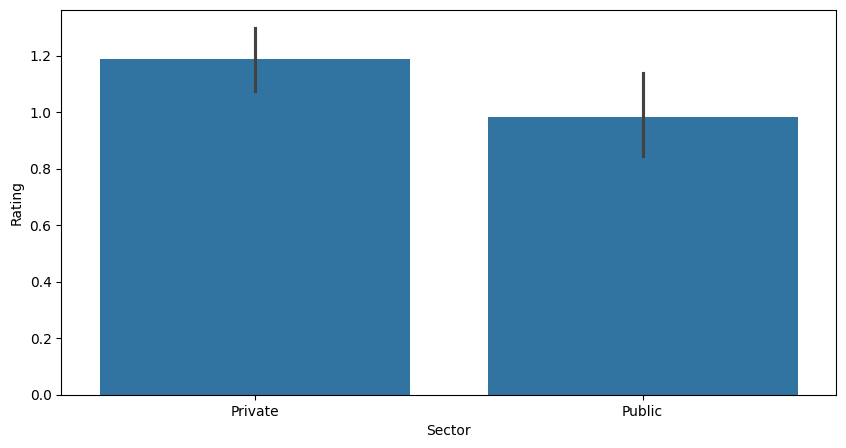

In [41]:

# draw bar graph for sector and rating column
plt.figure(figsize=(10, 5))
sns.barplot(x='Sector', y='Rating', data=df)
plt.show()


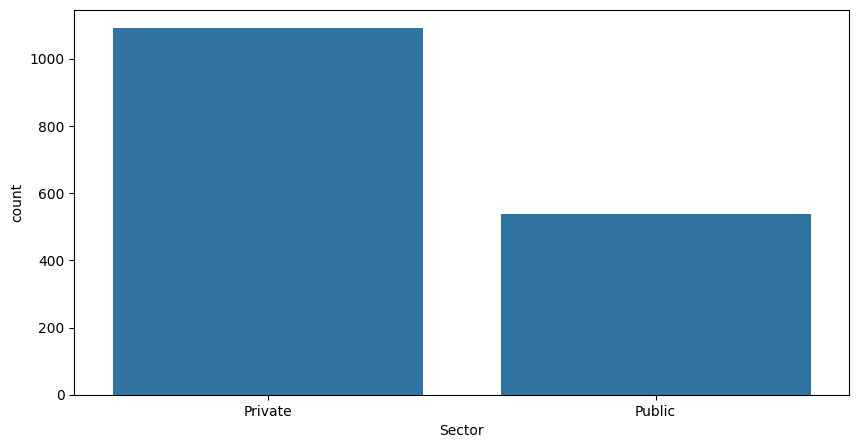

In [44]:
# Compare the number of colleges in the private and public sectors.
plt.figure(figsize=(10, 5))
sns.countplot(x='Sector', data=df)
plt.show()


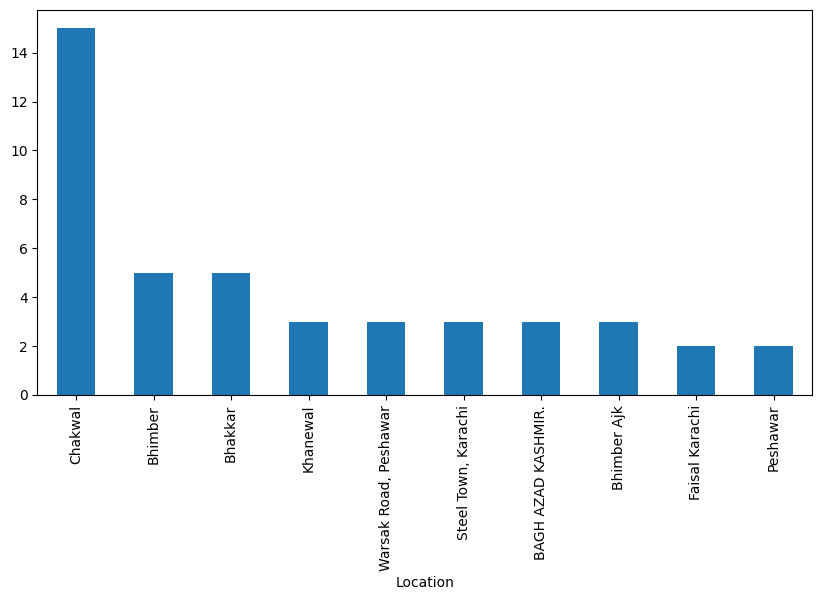

In [49]:
# cities with the highest number of colleges.
top_cities = df['Location'].value_counts().head(10)
plt.figure(figsize=(10, 5))
top_cities.plot(kind='bar')
plt.show()

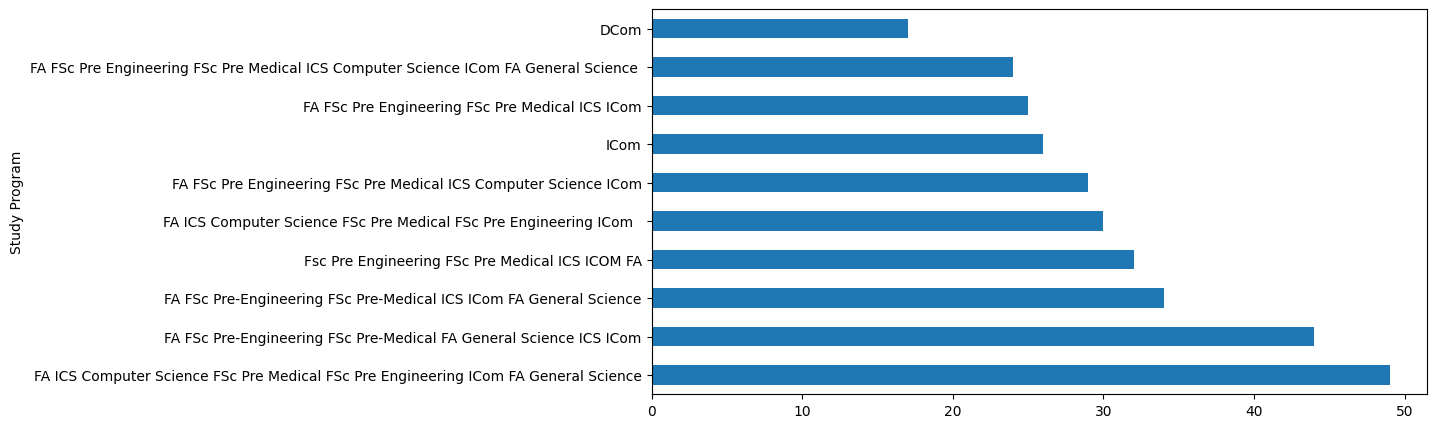

In [54]:
# Determine the most popular study programs based on the number of colleges offering them.
plt.figure(figsize=(10, 5))
df['Study Program'].value_counts().head(10).plot(kind='barh')
plt.show()


In [53]:
# the characteristics of these top-rated colleges.
top_colleges = df[df['Rating'] == 5].head(10)
top_colleges

,Name,Location,Study Program,Sector,Rating
1,Allama Iqbal Open University Aiou Islamabad,"Sector H-8, Islamabad-44000",FSc Pre Engineering ICs Computer Science FSc P...,Public,5.0
4,Lahore College For Women University (Lcwu) Lahore,"Near Wapda Flats, Jail Road, Lahore",FA Arts FSc Pre Engineering ICS Physics ICS St...,Public,5.0
5,University Of Agriculture Faisalabad,"University of Agriculture, Agriculture Univers...",FSc Pre Agriculture,Public,5.0
6,Pir Mehr Ali Shah Arid Agriculture University ...,"PMAS-Arid Agriculture University Rawalpindi, S...",FSc Pre Agriculture,Public,5.0
7,International Islamic University Iiu Islamabad,"International Islamic University Sector H-10, ...",FSc Pre-Engineering ICS FSc Pre-Medical Icom F...,Public,5.0
8,Kinnaird College For Women Lahore,"93- Jail Road, Lahore",FSc Pre Engineering ICS ICS Statistics ICS Phy...,Public,5.0
16,Allama Iqbal Open University Lahore AIOU,"Regional Campus, Allama Iqbal Open University,...",Higher Secondary School Certificate (Dars-E-Na...,Public,5.0
17,Islamia College Peshawar,Islamia College Peshawar University Campus Pes...,FSc Pre Engineering ICS FSc Pre Medical FA,Public,5.0
24,Lahore Garrison University (LGU),"Sector C, DHA Phase-VI Lahore",Fsc Pre Engineering ICS FSc Pre Medical Icom FA,Private,5.0
31,College of Tourism and Hotel Management COTHM ...,"5-C Main Gulberg II, Ayesha Saddiqa Road (Behi...",Intermediate in Culinary Arts (PBTE) Intermedi...,Private,5.0


# Final Report for Stakeholders

## Insights

1. **Data Overview**:
    - The dataset contains information about 1630 intermediate colleges in Pakistan.
    - Key columns include Name, Location, Study Program, Sector, and Rating.

2. **Missing Values**:
    - The 'Sector' column had missing values which were imputed using the mode.
    - The 'Location' column had missing values which were handled by dropping the rows.
    - The 'Affiliation' column had more than 50% missing values and was dropped.

3. **Data Cleaning**:
    - The 'Rating' column contained '*' symbols which were removed.
    - The datatype of the 'Rating' column was converted to float for analysis.

4. **Sector Distribution**:
    - The dataset includes both public and private sector colleges.
    - A pie chart shows the distribution of colleges between the public and private sectors.

5. **Rating Distribution**:
    - A histogram shows the distribution of ratings among the colleges.
    - The ratings range from 0 to 5, with a significant number of colleges having a rating of 0.

6. **Top Cities**:
    - The top cities with the highest number of colleges include Chakwal, Bhimber, and Bhakkar.

7. **Popular Study Programs**:
    - The most popular study programs based on the number of colleges offering them are FSc Pre Engineering, FSc Pre Medical, and ICS Computer Science.

8. **Top-Rated Colleges**:
    - A subset of the dataset shows the top 10 colleges with a rating of 5.0.
    - These colleges are predominantly in the public sector.

## Recommendations

1. **Addressing Missing Data**:
    - For future data collection, ensure that all fields, especially 'Affiliation', are filled to avoid significant data loss.

2. **Improving Ratings**:
    - Investigate the reasons behind low ratings (0) for many colleges and implement measures to improve their quality and performance.

3. **Sector Analysis**:
    - Conduct a deeper analysis to understand the differences in performance and facilities between public and private sector colleges.

4. **Geographical Expansion**:
    - Focus on expanding educational facilities in cities with fewer colleges to ensure equitable access to education across the country.

5. **Program Popularity**:
    - Encourage colleges to offer a diverse range of study programs to cater to different student interests and career paths.

## Suggestions

1. **Data Collection**:
    - Implement a standardized data collection process to ensure consistency and completeness of information.

2. **Quality Assurance**:
    - Regularly monitor and evaluate the performance of colleges to maintain high educational standards.

3. **Stakeholder Engagement**:
    - Engage with stakeholders, including students, parents, and educators, to gather feedback and make informed decisions.

4. **Policy Development**:
    - Develop policies that support the growth and improvement of both public and private sector colleges.

5. **Resource Allocation**:
    - Allocate resources effectively to address the needs of underperforming colleges and support their development.

By following these insights, recommendations, and suggestions, stakeholders can make informed decisions to enhance the quality and accessibility of intermediate education in Pakistan.